# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?parse_dates=

In [ ]:
# R. No gráfico que mede a variável 'educacao', houve queda significativa de 'secundario' e aumento 
# significativo de 'superior completo'.

In [134]:
import pandas as pd
import numpy as np 
import math
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.express as px
import seaborn as sns
np.random.seed(2360873)
N = 100

In [151]:
df = pd.read_csv('previsao_de_renda.csv')
df1 = df.drop(df[['Unnamed: 0','index']], axis=1)
df1['posse_de_veiculo'] = df1['posse_de_veiculo'].map({True: 1,False: 0})
df1['posse_de_imovel'] = df1['posse_de_imovel'].map({True: 1,False: 0})
df1['mau'] = df1['mau'].map({True: 1, False: 0})
df1.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,0,1,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,0,3369.24
1,2015-01-01,M,1,1,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,0,6096.14
2,2015-01-01,M,1,1,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,0,5658.98
3,2015-01-01,F,1,0,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,0,7246.69
4,2015-01-01,M,0,0,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,0,4017.37


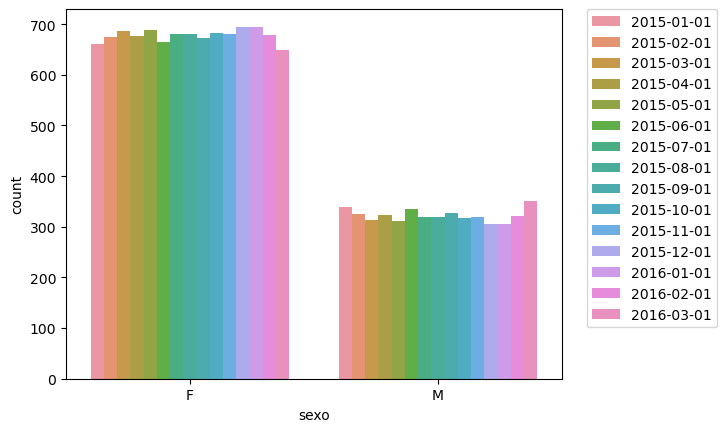

In [152]:
sns.countplot(x= df1['sexo'],  hue = df1['data_ref'], data=df1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

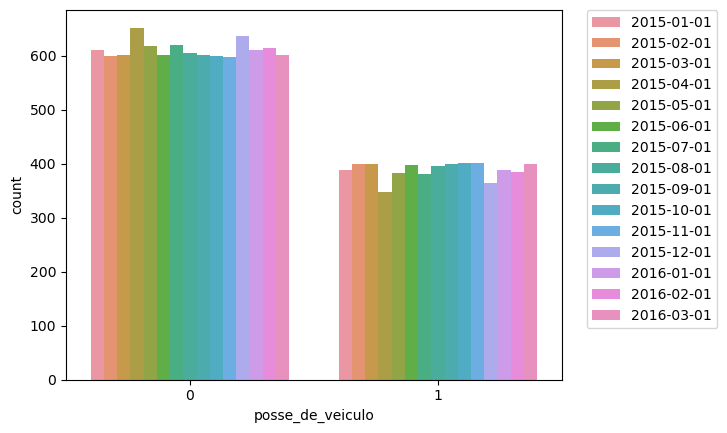

In [153]:
sns.countplot(x= df1['posse_de_veiculo'],  hue = df1['data_ref'], data=df1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

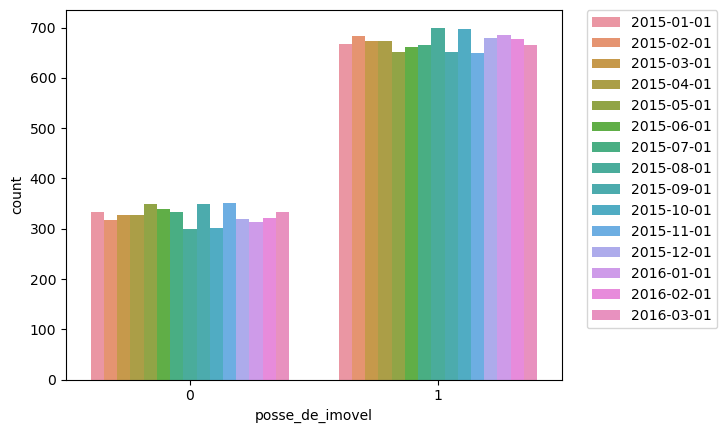

In [154]:
sns.countplot(x= df1['posse_de_imovel'],  hue = df1['data_ref'], data=df1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Assalariado'),
  Text(1, 0, 'Empresário'),
  Text(2, 0, 'Servidor público'),
  Text(3, 0, 'Pensionista'),
  Text(4, 0, 'Bolsista')])

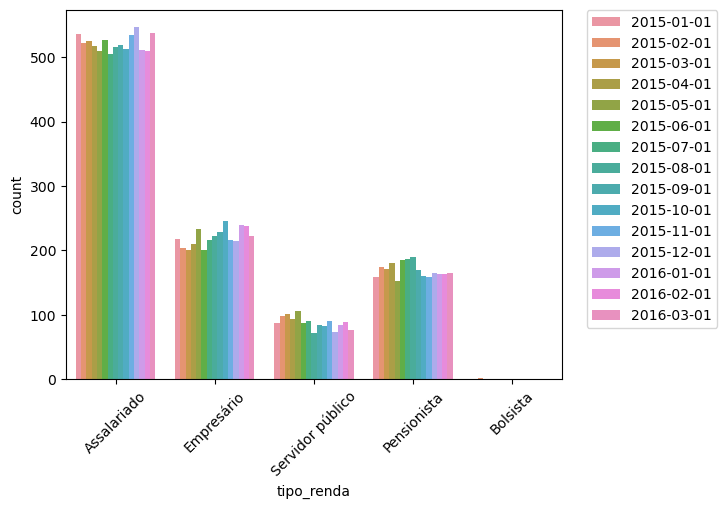

In [155]:
sns.countplot(x= df1['tipo_renda'],  hue = df1['data_ref'], data=df1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks( rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Secundário'),
  Text(1, 0, 'Superior completo'),
  Text(2, 0, 'Superior incompleto'),
  Text(3, 0, 'Primário'),
  Text(4, 0, 'Pós graduação')])

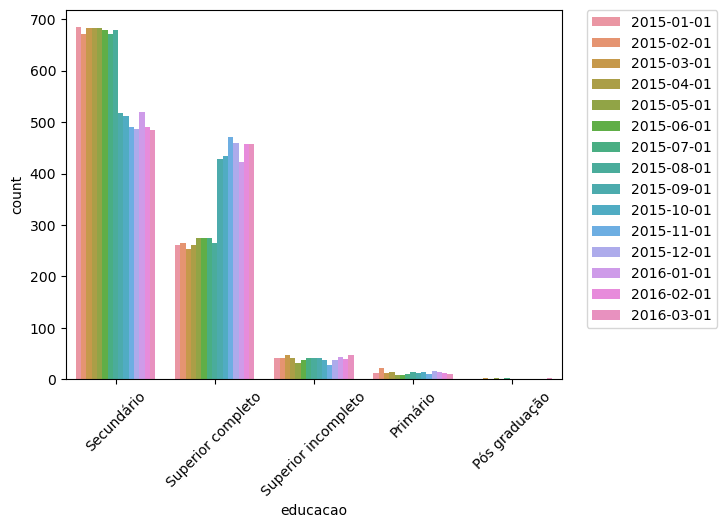

In [156]:
sns.countplot(x= df1['educacao'],  hue = df1['data_ref'], data=df1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks( rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Casado'),
  Text(1, 0, 'União'),
  Text(2, 0, 'Solteiro'),
  Text(3, 0, 'Separado'),
  Text(4, 0, 'Viúvo')])

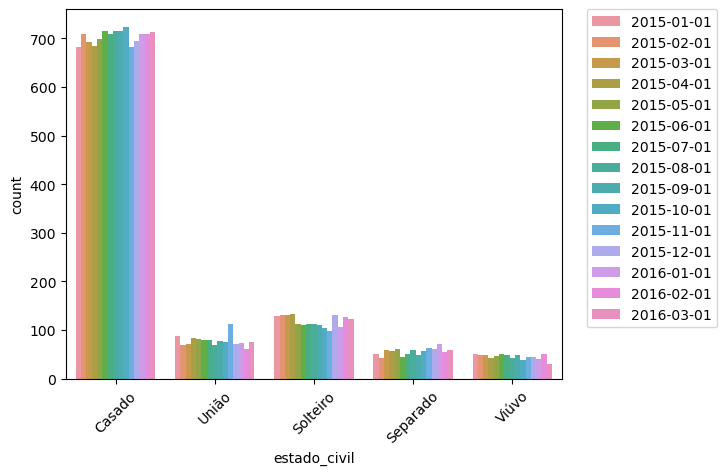

In [157]:
sns.countplot(x= df1['estado_civil'],  hue = df1['data_ref'], data=df1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks( rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Casa'),
  Text(1, 0, 'Com os pais'),
  Text(2, 0, 'Aluguel'),
  Text(3, 0, 'Governamental'),
  Text(4, 0, 'Estúdio'),
  Text(5, 0, 'Comunitário')])

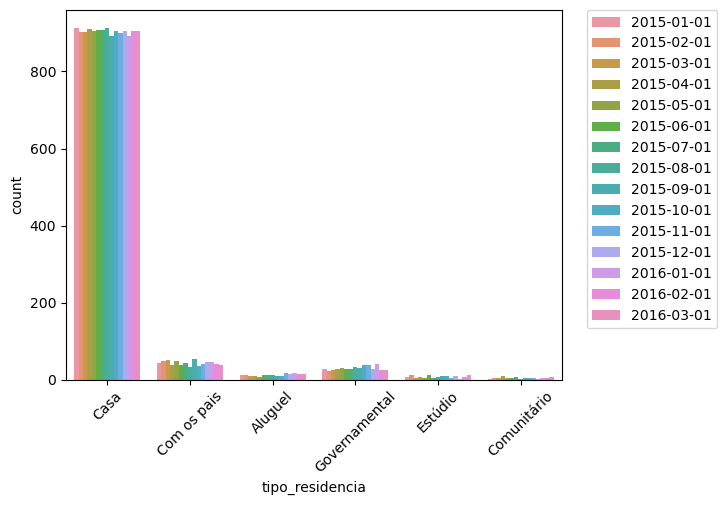

In [158]:
sns.countplot(x= df1['tipo_residencia'],  hue = df1['data_ref'], data=df1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks( rotation=45)

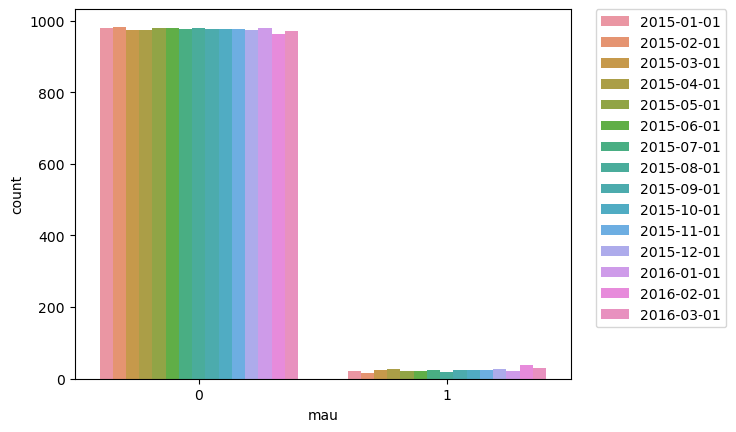

In [159]:
sns.countplot(x= df1['mau'],  hue = df1['data_ref'], data=df1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [160]:
# R. Da análise dos gráficos abaixo verifica-se que a maioria das variáveis qualitativas mostrou distribuição estável pelo tempo.

# Destaca-se a variável 'educacao' com queda significativa de 'secundario' e aumento significativo de 'superior completo' e, 
# no variável 'tipo_renda' houve um leve aumento em 'empresario'

# Sim. É possível utilizar as variáveis num modelo para previsão de renda.

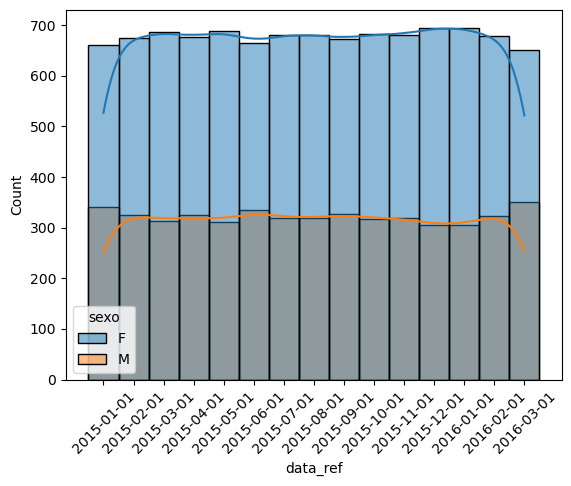

In [161]:
sns.histplot(data = df1, x = 'data_ref', hue = 'sexo', kde = True)
plt.xticks( rotation=45);

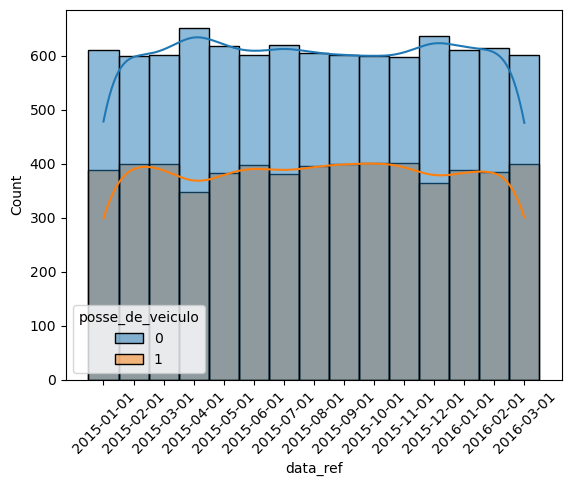

In [162]:
sns.histplot(data = df1, x = 'data_ref', hue = 'posse_de_veiculo', kde = True)
plt.xticks( rotation=45);

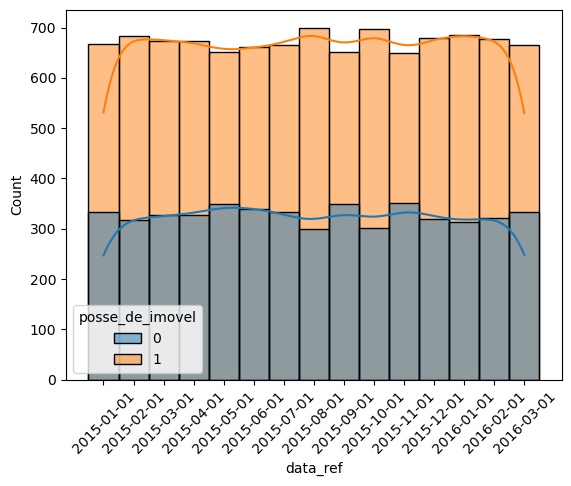

In [163]:
sns.histplot(data = df1, x = 'data_ref', hue = 'posse_de_imovel', kde = True)
plt.xticks( rotation=45);

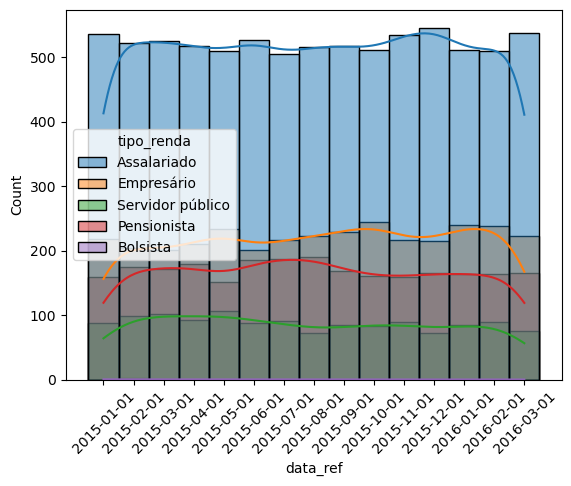

In [164]:
sns.histplot(data = df1, x = 'data_ref', hue = 'tipo_renda', kde = True)
plt.xticks( rotation=45);

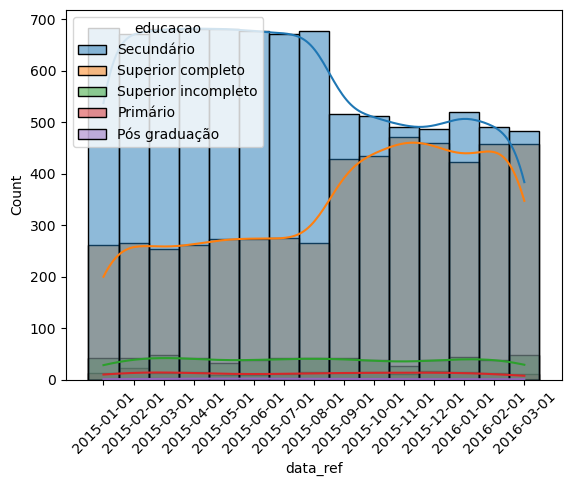

In [165]:
sns.histplot(data = df1, x = 'data_ref', hue = 'educacao', kde = True)
plt.xticks( rotation=45);

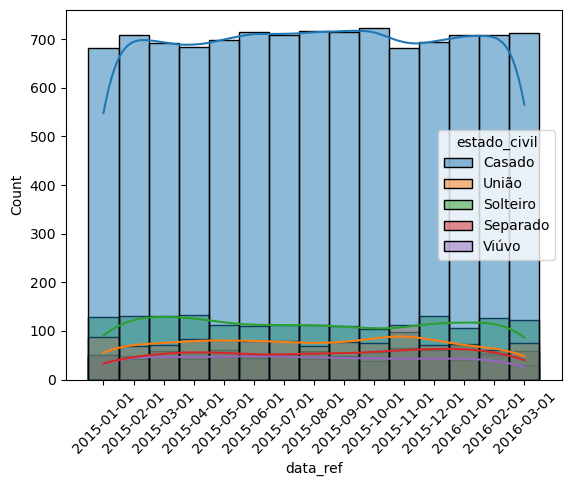

In [166]:
sns.histplot(data = df1, x = 'data_ref', hue = 'estado_civil', kde = True)
plt.xticks( rotation=45);

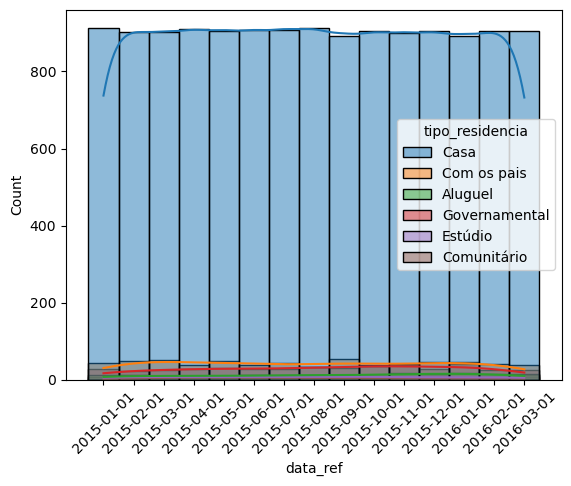

In [167]:
sns.histplot(data = df1, x = 'data_ref', hue = 'tipo_residencia', kde = True)
plt.xticks( rotation=45);

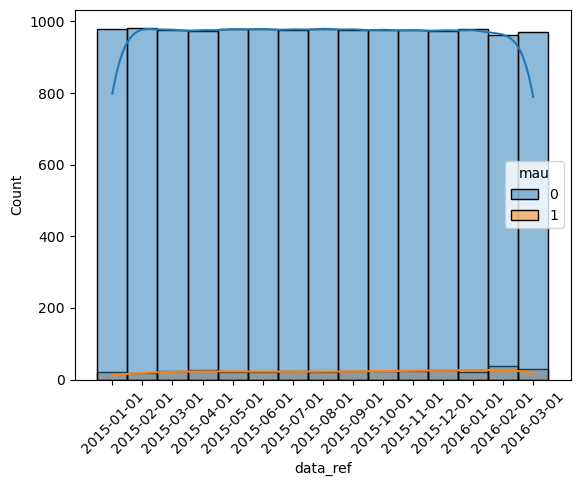

In [168]:
sns.histplot(data = df1, x = 'data_ref', hue = 'mau', kde = True)
plt.xticks( rotation=45);